# 1. Find/Create labeled dataset for NN

### STEP 1.1

In [2]:
!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist

Cloning into 'python-mnist'...
'.' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Imported the EMNIST libraries we need!


In [2]:
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Imported the EMNIST libraries we need!


### STEP 1.2

In [13]:
# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

In [14]:
# Make sure that every pixel in all of the images is a value between 0 and 1
# Preprocessing
X = X / 255

In [15]:
# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [17]:
# We need to record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

### STEP 1.3

Image Label: y


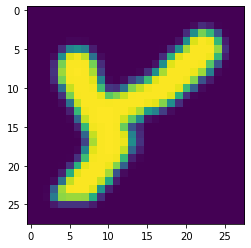

In [20]:
import matplotlib.pyplot as plt

img_index = 8888 
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

# 2. Create a neural network

### STEP 2.1

In [21]:
# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


### STEP 3.1

In [22]:
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.886500
Test set score: 0.840800


### STEP 3.2

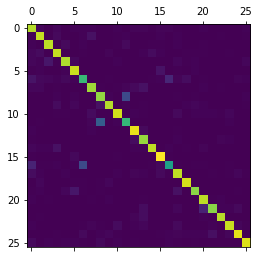

In [23]:
# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

### STEP 3.3

There were 84 times that the letter i was predicted to be the letter l.


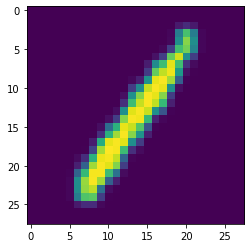

In [28]:
# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'l'
actual_letter = 'i'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
    if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
        mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
    img = X_test[mistake_list[mistake_to_show]]
    plt.imshow(img.reshape((28,28)))
else:
    print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

### STEP 3.4

In [29]:
# Change some of the values in the below statement and re-run to see how they 
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25723763
Iteration 13, loss = 0.24092200
Iteration 14, loss = 0.23226412
Iteration 15, loss = 0.23512006
Iteration 16, loss = 0.22575190
Iteration 17, loss = 0.22427105
Iteration 18, loss = 0.22087140
Iteration 19, loss = 0.21420822
Iteration 20, loss = 0.20687608
Iteration 21, loss = 0.20286756
Iteration 22, loss = 0.20410037
Iteration 23, loss = 0.19924623
Iteration 24, loss = 0.19453563
Iteration 25, loss = 0.20100520
Iteration 26, loss = 0.19723902
Iteration 27, loss = 0.19461739
Iteration 28, loss = 0.19810787
Iteration 29, loss = 0.19411719
Iteration 30, loss = 0.19403925
Iteration 31, loss = 0.18427764
Iteration 32, los

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.950067
Test set score: 0.889100


# 4. Testing on custom data

### STEP 4.1

In [62]:
# Clone the GitHub repository if it doesn't exist
import os
if not os.path.exists("lab1-neural-networks"):
    !git clone https://github.com/crash-course-ai/lab1-neural-networks.git

# List the files in the "letters_mod" directory
import os
if os.path.exists("lab1-neural-networks/letters_mod"):
    files = os.listdir("lab1-neural-networks/letters_mod")
    files.sort()
    for file in files:
        print(file)
else:
    print("The 'letters_mod' directory does not exist.")

# Get the current working directory
print(os.getcwd())

00.jpg
01.jpg
02.jpg
03.jpg
04.jpg
05.jpg
06.jpg
07.jpg
08.jpg
09.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
80.jpg
81.jpg
82.jpg
83.jpg
84.jpg
85.jpg
86.jpg
87.jpg
88.jpg
89.jpg
90.jpg
91.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
97.jpg
98.jpg
99.jpg
C:\Users\user\lab1-neural-networks


### STEP 4.2

Imported the scanned images.


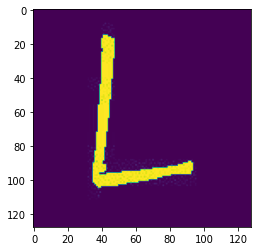

In [64]:
# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []

# Update the file paths to use the cloned repository directory
for i in range(len(files)):
    img = cv2.imread("lab1-neural-networks/letters_mod/" + files[i], cv2.IMREAD_GRAYSCALE)
    handwritten_story.append(img)

print("Imported the scanned images.")

# Display one of the imported images
plt.imshow(handwritten_story[7])  # <--- Change this index to see different letters
plt.show()  # Show the image


### STEP 4.3

In [65]:
# These are libraries we need to do some math on the image
# to be able to give it to the MLP in the right format and to resize it to 28x28 pixels
import numpy
import cv2

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tkejfauctjiujourjpowerjsuppliesjijfeccjinjloyejthejwayjyqurjaatteryjoersjskpwkyjamojthenjalljarjprcr


### STEP 4.4

In [68]:
# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    
    #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
    total_pixel_value = 0
    for j in range(28):
        for k in range(28):
              total_pixel_value += letter[j,k]
    if total_pixel_value < 20:
        typed_story = typed_story + " "
    else:         #if it NOT a blank, it actually runs the prediction algorithm on it
        single_item_array = (numpy.array(letter)).reshape(1,784)
        prediction = mlp2.predict(single_item_array)
        typed_story = typed_story + str(chr(prediction[0]+96))

print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tke fauct iu our power supplies i fecc in loye the way yqur aattery oers skpwky amo then all ar prcr


### STEP 4.5

Processed the scanned images.


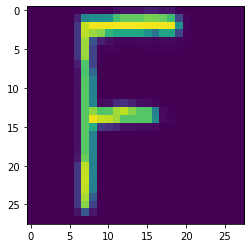

In [72]:
# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here: https://arxiv.org/abs/1702.05373v1
processed_story = []

for img in handwritten_story:
    #step 1: Apply Gaussian blur filter
    img = cv2.GaussianBlur(img, (7,7), 0)
  
    #steps 2 and 3: Extract the Region of Interest in the image and center in square
    points = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(points)
    if (w > 0 and h > 0):
        if w > h:
            y = y - (w-h)//2
            img = img[y:y+w, x:x+w]
        else:
            x = x - (h-w)//2
            img = img[y:y+h, x:x+h]
     
    #step 4: Resize and resample to be 28 x 28 pixels
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
  
    #step 5: Normalize pixels and reshape before adding to the new story array
    img = img/255
    img = img.reshape((28,28))
    processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[4]) #<<< change this index if you want to see a different letter from the story

### STEP 4.6

In [74]:
# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
the fault in gur power supplfes i fell in love the way your battery dges slowly and then all af onee
